In [5]:
import pandas as pd

In [6]:
import numpy as np

In [31]:
tst = [
'0000',
'1111',
'1000',
'0100',
'0010',
'0001',
'1100',
'0110',
'0011',
'1110',
'0111',
'1011',
'1101',
'1110',
'0011',
'1001',
'1100',
'0001',
'1000',
]

In [32]:
len(tst)

19

In [33]:
check = []
for entry in tst:
    if entry not in check:
        check.append(entry)
len(check)

14

In [7]:
import random

2

In [8]:
plot_res = []
for b in range(25):
    counter = 0
    results = []
    for i in range(5000):
        res = []
        for k in range(b):
            res.append(random.randint(0,1))
        if res not in results:
            results.append(res)
            counter +=1
    plot_res.append(b / counter)
    

In [9]:

import matplotlib.pyplot as plt

In [16]:
res = []
for i in range (64):
    for k in range(64):
        if i == k:
            continue
        if (i, k) in res:
            continue
        res.append((i,k))
len(res)

4032

In [15]:
boys = [1,2,3,4,5,6]
girls = [7,8,9,10]



In [23]:
98/27

3.6296296296296298

In [22]:
(2*6+3*8+4*9+5*4) / (6+8+9+4)

3.4074074074074074

In [24]:
tst = '222222333333334444444445555'

In [29]:
tst = list(tst)

In [32]:
for i in range (len(tst)):
    tst[i] = eval(tst[i])

In [34]:
tst.mode()

AttributeError: 'list' object has no attribute 'mode'

In [26]:
len(tst) // 2

13

In [27]:
tst[13]

'3'

In [19]:
98/27

3.6296296296296298

In [35]:
10*0.3+20*0.2+-30*0.1+40*0.2+50*0.2

22.0

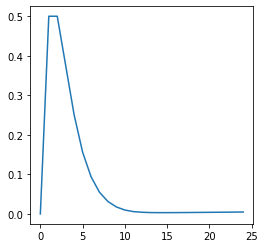

In [11]:
plt.figure(figsize=(4,4))
plt.plot(list(range(len(plot_res))), plot_res)
plt.show()

In [30]:
results

[[1, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 1],
 [1, 1, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 1, 0]]

In [7]:
len(tst)

19

In [2]:
df = pd.read_csv('16_data.csv')
df.head()

,age,surgery_year,positive_nodes,target
0,30,1964,1,0
1,30,1962,3,0
2,30,1965,0,0
3,31,1959,2,0
4,31,1965,4,0


In [3]:
df['target'].value_counts()

0    225
1     81
Name: target, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1

df_train, df_test = train_test_split(df, stratify=df['target'], test_size=0.2, random_state=RANDOM_SEED)

In [5]:
from sklearn.utils import resample

df_min = df_train[df_train['target'] == 1]
df_maj = df_train[df_train['target'] == 0]

df_min_upsample = resample(df_min, replace=True, n_samples=len(df_maj), random_state=RANDOM_SEED)

print(df_min_upsample.shape)
print(df_maj.shape)


(179, 4)
(179, 4)


In [6]:
df_1 = pd.concat([df_min_upsample, df_maj], ignore_index=True).sample(frac=1.)
df_1

,age,surgery_year,positive_nodes,target
166,45,1967,1,1
248,47,1963,6,0
120,43,1964,0,1
339,34,1960,0,0
323,64,1958,0,0
...,...,...,...,...
160,44,1958,9,1
348,52,1963,4,0
170,72,1963,0,1
47,47,1963,23,1


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

features = ['age', 'surgery_year', 'positive_nodes']
target = 'target'

X_train, y_train = df_1[features], df_1[target]
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED)
model.fit(X_train, y_train)

X_test, y_test = df_test[features], df_test[target]
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.6263586956521738


In [8]:
df_maj_downsample = resample(df_maj, replace=False, n_samples=len(df_min), random_state=RANDOM_SEED)

print(df_maj_downsample.shape)
print(df_min.shape)

(65, 4)
(65, 4)


In [9]:
df_2 = pd.concat([df_maj_downsample, df_min], ignore_index=True).sample(frac=1.)

X_train, y_train = df_2[features], df_2[target]
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED)
model.fit(X_train, y_train)

X_test, y_test = df_test[features], df_test[target]
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.5957880434782609


## Видео 2

!pip install imbalanced-learn

In [10]:
df_train.shape

(244, 4)

In [11]:
df_test.shape

(62, 4)

In [12]:
import imblearn

In [14]:
?SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=RANDOM_SEED, k_neighbors=2)

features = ['age', 'surgery_year', 'positive_nodes']
target = 'target'

X_train, y_train = os.fit_resample(df_train[features], df_train[target])

In [ ]:
y_train.value_counts()

0    179
1    179
Name: target, dtype: int64

In [ ]:
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED)
model.fit(X_train, y_train)

X_test, y_test = df_test[features], df_test[target]
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.6331521739130435


## Видео 3

In [ ]:
df_train[df_train['target'] == 0].shape

(179, 4)

In [ ]:
df_train[df_train['target'] == 1].shape

(65, 4)

In [ ]:
class_weights = {
    0: 1,
    1: (df_train[df_train['target'] == 0].shape[0] / df_train[df_train['target'] == 1].shape[0]) ** 3
}

In [ ]:
features = ['age', 'surgery_year', 'positive_nodes']
target = 'target'

X_train, y_train = df_train[features], df_train[target]

model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED, class_weight=class_weights)

model.fit(X_train, y_train)

X_test, y_test = df_test[features], df_test[target]
print(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

0.6535326086956522


## Видео 4

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_SEED)

models = []
metrics = []

features = ['age', 'surgery_year', 'positive_nodes']
target = 'target'
X, y = df[features], df[target]

for train_index, test_index in kf.split(X, y):
  X_train, y_train = X.values[train_index], y.values[train_index]
  X_test, y_test = X.values[test_index], y.values[test_index]

  model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=RANDOM_SEED, class_weight='balanced')

  model.fit(X_train, y_train)
  score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
  print(score)

  models.append(model)
  metrics.append(score)

0.5390123456790124
0.6227160493827161
0.7066666666666667


In [ ]:
sum(metrics) / len(metrics)

0.6227983539094649